In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import mglearn

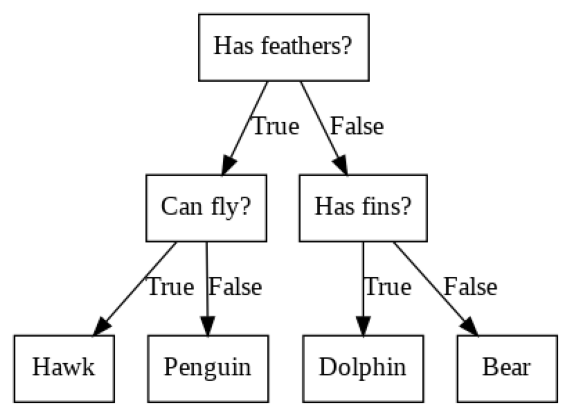

In [3]:
plt.figure(figsize=(10,10))
mglearn.plots.plot_animal_tree()

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [5]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=cancer.target, 
                                                    test_size = 0.3,
                                                    random_state=77)

In [6]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.912


In [7]:
for i in range(1,7,1):
  tree = DecisionTreeClassifier(max_depth=i, random_state=0)
  tree.fit(X_train, y_train)
  print(f"max_depth : {i}")
  print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
  print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

max_depth : 1
훈련 세트 정확도 : 0.932
테스트 세트 정확도 : 0.883
max_depth : 2
훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.912
max_depth : 3
훈련 세트 정확도 : 0.982
테스트 세트 정확도 : 0.906
max_depth : 4
훈련 세트 정확도 : 0.985
테스트 세트 정확도 : 0.906
max_depth : 5
훈련 세트 정확도 : 0.992
테스트 세트 정확도 : 0.889
max_depth : 6
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.901


In [8]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(X_train, y_train)
print(f"max_depth : {i}")
print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

max_depth : 6
훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.912


In [9]:
from sklearn.tree import export_graphviz
import graphviz

In [10]:
export_graphviz(tree, 
                out_file="tree.dot", 
                class_names=['악성', '양성'],
                feature_names = cancer.feature_names, 
                impurity = False,  # gini 계수
                filled=True)       # color 

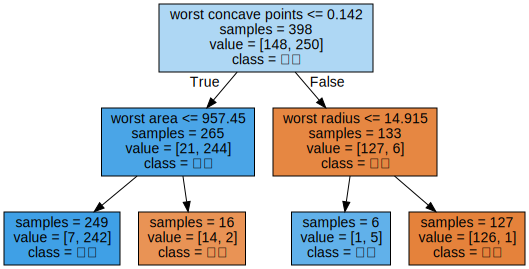

In [11]:
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))